In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from tensorflow.keras.optimizers import Adam


In [2]:
# Load MNIST data
(x_train, _), (_, _) = mnist.load_data()

# Normalize data
x_train = x_train / 127.5 - 1.0
x_train = np.expand_dims(x_train, axis=-1)


In [3]:
# GAN parameters
img_rows, img_cols, channels = 28, 28, 1
latent_dim = 100

# Generator model
generator = Sequential([
    Dense(128, input_dim=latent_dim),
    LeakyReLU(alpha=0.2),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dense(img_rows * img_cols * channels, activation='tanh'),
    Reshape((img_rows, img_cols, channels))
])

# Discriminator model
discriminator = Sequential([
    Flatten(input_shape=(img_rows, img_cols, channels)),
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])


In [4]:
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
                      metrics=['accuracy'])

In [5]:
# Combined GAN model
discriminator.trainable = false
gan_input = generator.input
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy',
            optimizer=Adam(learning_rate=0.0002, beta_1=0.5))



2/2 [==============================] - 2s 47ms/step
Epoch 0: [D loss: 0.5104994177818298, acc.: 57.03125%] [G loss: 0.7309973239898682]
1/1 [==============================] - 1s 760ms/step


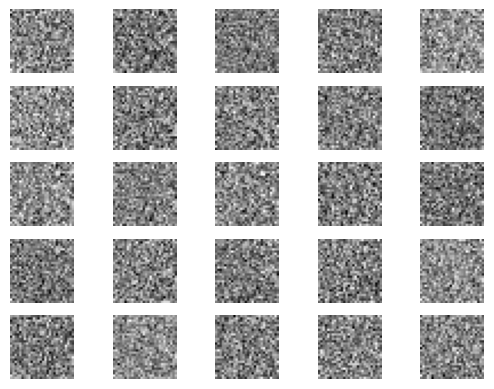

2/2 [==============================] - 0s 16ms/step
Epoch 100: [D loss: 0.6519418060779572, acc.: 48.4375%] [G loss: 0.9405587911605835]
2/2 [==============================] - 0s 7ms/step
Epoch 200: [D loss: 0.40226759016513824, acc.: 94.53125%] [G loss: 1.2975754737854004]
2/2 [==============================] - 0s 5ms/step
Epoch 300: [D loss: 0.36483611166477203, acc.: 92.96875%] [G loss: 1.4465603828430176]
2/2 [==============================] - 0s 0s/step
Epoch 400: [D loss: 0.42752446234226227, acc.: 87.5%] [G loss: 1.6681022644042969]
2/2 [==============================] - 0s 0s/step
Epoch 500: [D loss: 0.4727965295314789, acc.: 78.125%] [G loss: 1.8113197088241577]
2/2 [==============================] - 0s 5ms/step
Epoch 600: [D loss: 0.5208432972431183, acc.: 76.5625%] [G loss: 1.505323052406311]
2/2 [==============================] - 0s 16ms/step
Epoch 700: [D loss: 0.4581891894340515, acc.: 83.59375%] [G loss: 1.916335105895996]
2/2 [==============================] - 0s 0s/ste

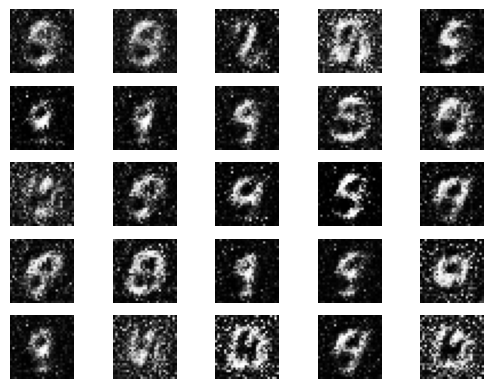

2/2 [==============================] - 0s 1ms/step
Epoch 1100: [D loss: 0.41892723739147186, acc.: 82.8125%] [G loss: 2.060011148452759]
2/2 [==============================] - 0s 5ms/step
Epoch 1200: [D loss: 0.3798064589500427, acc.: 87.5%] [G loss: 2.013399362564087]
2/2 [==============================] - 0s 5ms/step
Epoch 1300: [D loss: 0.4537968039512634, acc.: 81.25%] [G loss: 1.9516100883483887]
2/2 [==============================] - 0s 7ms/step
Epoch 1400: [D loss: 0.5506159067153931, acc.: 74.21875%] [G loss: 1.8220493793487549]
2/2 [==============================] - 0s 16ms/step
Epoch 1500: [D loss: 0.4391011893749237, acc.: 86.71875%] [G loss: 1.8121533393859863]
2/2 [==============================] - 0s 0s/step
Epoch 1600: [D loss: 0.47191180288791656, acc.: 78.125%] [G loss: 1.9865808486938477]
2/2 [==============================] - 0s 0s/step
Epoch 1700: [D loss: 0.43796686828136444, acc.: 86.71875%] [G loss: 2.0939507484436035]
2/2 [==============================] - 0s 0s

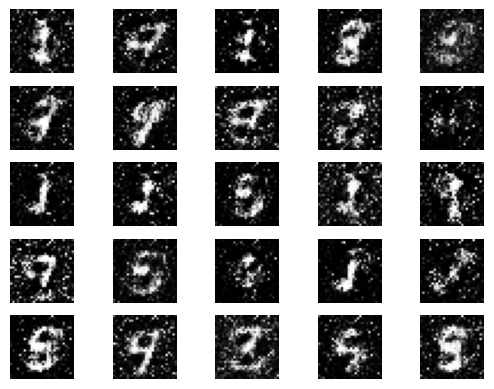

2/2 [==============================] - 0s 5ms/step
Epoch 2100: [D loss: 0.3453355133533478, acc.: 88.28125%] [G loss: 2.209185838699341]
2/2 [==============================] - 0s 0s/step
Epoch 2200: [D loss: 0.38828878104686737, acc.: 87.5%] [G loss: 2.1808717250823975]
2/2 [==============================] - 0s 17ms/step
Epoch 2300: [D loss: 0.4962727725505829, acc.: 76.5625%] [G loss: 1.9199188947677612]
2/2 [==============================] - 0s 0s/step
Epoch 2400: [D loss: 0.42056460678577423, acc.: 83.59375%] [G loss: 2.1133806705474854]
2/2 [==============================] - 0s 16ms/step
Epoch 2500: [D loss: 0.3303869664669037, acc.: 85.9375%] [G loss: 2.610585927963257]
2/2 [==============================] - 0s 16ms/step
Epoch 2600: [D loss: 0.4822791665792465, acc.: 82.8125%] [G loss: 2.1316990852355957]
2/2 [==============================] - 0s 0s/step
Epoch 2700: [D loss: 0.4970037341117859, acc.: 77.34375%] [G loss: 2.106997013092041]
2/2 [==============================] - 0s 

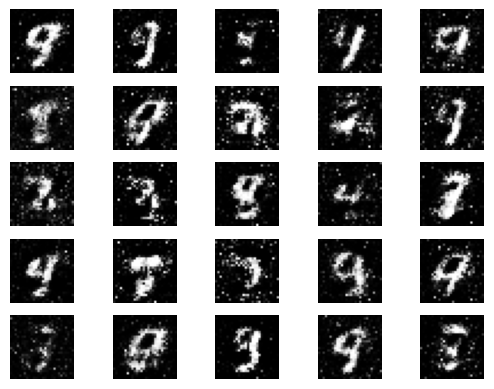

2/2 [==============================] - 0s 5ms/step
Epoch 3100: [D loss: 0.3706437051296234, acc.: 82.8125%] [G loss: 2.124009609222412]
2/2 [==============================] - 0s 5ms/step
Epoch 3200: [D loss: 0.41672272980213165, acc.: 80.46875%] [G loss: 2.223165512084961]
2/2 [==============================] - 0s 5ms/step
Epoch 3300: [D loss: 0.37397371232509613, acc.: 85.15625%] [G loss: 2.043160915374756]
2/2 [==============================] - 0s 5ms/step
Epoch 3400: [D loss: 0.38231806457042694, acc.: 82.8125%] [G loss: 2.386432647705078]
2/2 [==============================] - 0s 5ms/step
Epoch 3500: [D loss: 0.3596555143594742, acc.: 82.8125%] [G loss: 2.2501330375671387]
2/2 [==============================] - 0s 7ms/step
Epoch 3600: [D loss: 0.374363511800766, acc.: 89.84375%] [G loss: 2.1873950958251953]
2/2 [==============================] - 0s 6ms/step
Epoch 3700: [D loss: 0.3782907724380493, acc.: 85.15625%] [G loss: 2.1893692016601562]
2/2 [==============================] - 

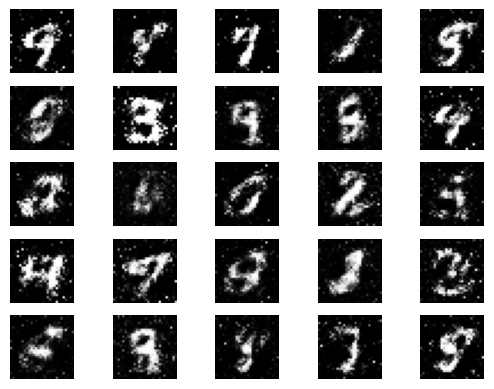

2/2 [==============================] - 0s 6ms/step
Epoch 4100: [D loss: 0.33102336525917053, acc.: 87.5%] [G loss: 1.7358977794647217]
2/2 [==============================] - 0s 7ms/step
Epoch 4200: [D loss: 0.46188871562480927, acc.: 77.34375%] [G loss: 1.601323127746582]
2/2 [==============================] - 0s 5ms/step
Epoch 4300: [D loss: 0.3857605457305908, acc.: 82.8125%] [G loss: 2.001128673553467]
2/2 [==============================] - 0s 6ms/step
Epoch 4400: [D loss: 0.48069077730178833, acc.: 80.46875%] [G loss: 1.5437085628509521]
2/2 [==============================] - 0s 6ms/step
Epoch 4500: [D loss: 0.4042747765779495, acc.: 81.25%] [G loss: 1.8061120510101318]
2/2 [==============================] - 0s 7ms/step
Epoch 4600: [D loss: 0.5196321308612823, acc.: 70.3125%] [G loss: 1.5156886577606201]
2/2 [==============================] - 0s 6ms/step
Epoch 4700: [D loss: 0.4824684411287308, acc.: 75.0%] [G loss: 1.5422879457473755]
2/2 [==============================] - 0s 7ms/

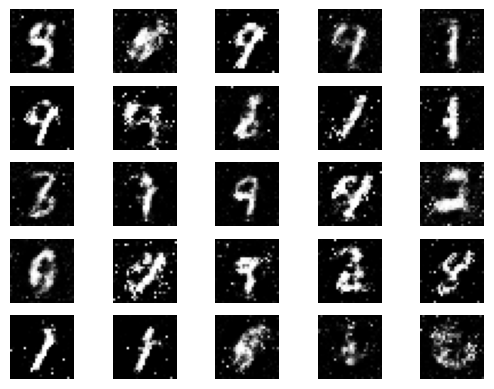

2/2 [==============================] - 0s 7ms/step
Epoch 5100: [D loss: 0.4728798568248749, acc.: 75.78125%] [G loss: 1.4417481422424316]
2/2 [==============================] - 0s 7ms/step
Epoch 5200: [D loss: 0.526722863316536, acc.: 74.21875%] [G loss: 1.4629220962524414]
2/2 [==============================] - 0s 5ms/step
Epoch 5300: [D loss: 0.4777377247810364, acc.: 80.46875%] [G loss: 1.567307710647583]
2/2 [==============================] - 0s 8ms/step
Epoch 5400: [D loss: 0.5538575500249863, acc.: 71.09375%] [G loss: 1.3956081867218018]
2/2 [==============================] - 0s 11ms/step
Epoch 5500: [D loss: 0.4982587993144989, acc.: 73.4375%] [G loss: 1.6201797723770142]
2/2 [==============================] - 0s 8ms/step
Epoch 5600: [D loss: 0.6296769082546234, acc.: 64.0625%] [G loss: 1.260974407196045]
2/2 [==============================] - 0s 8ms/step
Epoch 5700: [D loss: 0.41346995532512665, acc.: 82.03125%] [G loss: 1.4995726346969604]
2/2 [==============================] 

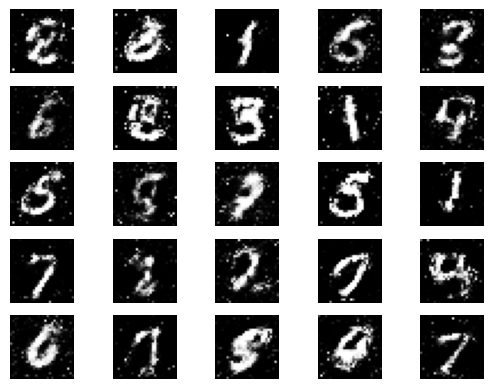

2/2 [==============================] - 0s 6ms/step
Epoch 6100: [D loss: 0.5467328429222107, acc.: 71.09375%] [G loss: 1.3401998281478882]
2/2 [==============================] - 0s 7ms/step
Epoch 6200: [D loss: 0.49498316645622253, acc.: 73.4375%] [G loss: 1.3584567308425903]
2/2 [==============================] - 0s 8ms/step
Epoch 6300: [D loss: 0.5436869859695435, acc.: 75.0%] [G loss: 1.356520414352417]
2/2 [==============================] - 0s 14ms/step
Epoch 6400: [D loss: 0.6059798002243042, acc.: 66.40625%] [G loss: 1.3907339572906494]
2/2 [==============================] - 0s 6ms/step
Epoch 6500: [D loss: 0.5833365023136139, acc.: 67.1875%] [G loss: 1.3028219938278198]
2/2 [==============================] - 0s 8ms/step
Epoch 6600: [D loss: 0.4924246072769165, acc.: 73.4375%] [G loss: 1.2871497869491577]
2/2 [==============================] - 0s 7ms/step
Epoch 6700: [D loss: 0.5154072046279907, acc.: 78.90625%] [G loss: 1.3500226736068726]
2/2 [==============================] - 0

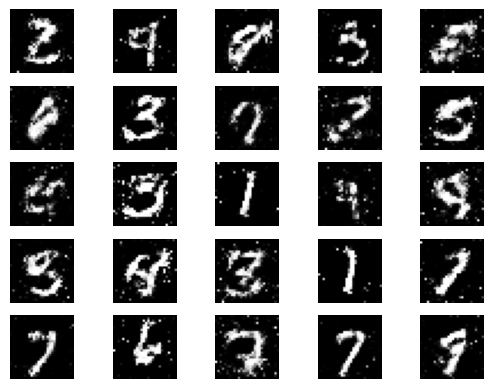

2/2 [==============================] - 0s 8ms/step
Epoch 7100: [D loss: 0.5504681169986725, acc.: 69.53125%] [G loss: 1.3468374013900757]
2/2 [==============================] - 0s 6ms/step
Epoch 7200: [D loss: 0.526264488697052, acc.: 75.0%] [G loss: 1.3226133584976196]
2/2 [==============================] - 0s 8ms/step
Epoch 7300: [D loss: 0.4436676353216171, acc.: 82.8125%] [G loss: 1.4329087734222412]
2/2 [==============================] - 0s 9ms/step
Epoch 7400: [D loss: 0.563576340675354, acc.: 75.0%] [G loss: 1.3382116556167603]
2/2 [==============================] - 0s 7ms/step
Epoch 7500: [D loss: 0.4567233622074127, acc.: 80.46875%] [G loss: 1.322104573249817]
2/2 [==============================] - 0s 8ms/step
Epoch 7600: [D loss: 0.49180443584918976, acc.: 75.78125%] [G loss: 1.203359842300415]
2/2 [==============================] - 0s 9ms/step
Epoch 7700: [D loss: 0.5136440247297287, acc.: 78.125%] [G loss: 1.271270751953125]
2/2 [==============================] - 0s 8ms/ste

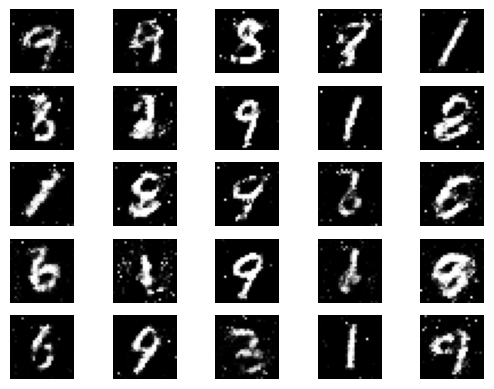

2/2 [==============================] - 0s 7ms/step
Epoch 8100: [D loss: 0.5285776257514954, acc.: 72.65625%] [G loss: 1.3712337017059326]
2/2 [==============================] - 0s 6ms/step
Epoch 8200: [D loss: 0.4791341572999954, acc.: 75.0%] [G loss: 1.4951939582824707]
2/2 [==============================] - 0s 8ms/step
Epoch 8300: [D loss: 0.5016225129365921, acc.: 77.34375%] [G loss: 1.3650599718093872]
2/2 [==============================] - 0s 9ms/step
Epoch 8400: [D loss: 0.530738964676857, acc.: 69.53125%] [G loss: 1.3788577318191528]
2/2 [==============================] - 0s 8ms/step
Epoch 8500: [D loss: 0.44732236862182617, acc.: 82.8125%] [G loss: 1.4554214477539062]
2/2 [==============================] - 0s 7ms/step
Epoch 8600: [D loss: 0.6689350306987762, acc.: 60.15625%] [G loss: 1.4087247848510742]
2/2 [==============================] - 0s 7ms/step
Epoch 8700: [D loss: 0.47965866327285767, acc.: 75.0%] [G loss: 1.3751888275146484]
2/2 [==============================] - 0s 

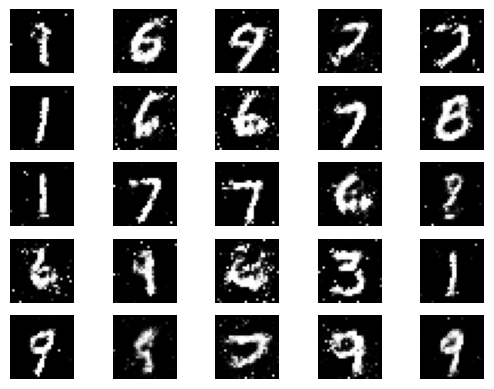

2/2 [==============================] - 0s 8ms/step
Epoch 9100: [D loss: 0.5211231112480164, acc.: 75.78125%] [G loss: 1.2560772895812988]
2/2 [==============================] - 0s 8ms/step
Epoch 9200: [D loss: 0.5372577011585236, acc.: 72.65625%] [G loss: 1.292924404144287]
2/2 [==============================] - 0s 8ms/step
Epoch 9300: [D loss: 0.5218173563480377, acc.: 70.3125%] [G loss: 1.3627266883850098]
2/2 [==============================] - 0s 8ms/step
Epoch 9400: [D loss: 0.5306651592254639, acc.: 70.3125%] [G loss: 1.528024673461914]
2/2 [==============================] - 0s 9ms/step
Epoch 9500: [D loss: 0.5021881759166718, acc.: 72.65625%] [G loss: 1.3548009395599365]
2/2 [==============================] - 0s 11ms/step
Epoch 9600: [D loss: 0.48444749414920807, acc.: 78.90625%] [G loss: 1.4528663158416748]
2/2 [==============================] - 0s 9ms/step
Epoch 9700: [D loss: 0.5163955986499786, acc.: 71.875%] [G loss: 1.2654972076416016]
2/2 [==============================] -

In [6]:
# Training GAN
batch_size = 64
epochs = 10000

for epoch in range(epochs):
    # Select a random batch of images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator (adversarial network)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_y)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

        # Save generated images
        if epoch % 1000 == 0:
            r, c = 5, 5
            noise = np.random.normal(0, 1, (r * c, latent_dim))
            gen_imgs = generator.predict(noise) * 0.5 + 0.5
            fig, axs = plt.subplots(r, c)
            cnt = 0
            for i in range(r):
                for j in range(c):
                    axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                    axs[i, j].axis('off')
                    cnt += 1
            plt.show()